## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

3. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

4. The assignment is worth 100 points, and is due on **18th Nov 2024 at 11:59 pm**. No extension is possible on this assignment due to tight grading deadlines. 

5. You are **not allowed to use a `for` loop in this assignment**.

6. If you are updating a dataset (imputing missing values / creating new variables), then use the updated dataset in a subsequent question.

7. **Five points are properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (2 pts).
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt)
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt)

## F.1 Canadian Fish Biodiversity

Read data from the file *Canadian_Fish_Biodiversity.csv* on Canvas. Each row records a unique fishing event from a 2013 sample of fish populations in Ontario, Canada. To analyze the results of these fishing surveys, we need to understand the dynamics of projects, sites, and geographic locations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

canada_data = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Data/Canadian_Fish_Biodiversity.csv")
canada_data.head()

,SITEID,Species,Number Captured,Minimum (mm),Maximum (mm),Project Name,Day,Month,Year,Waterbody Name,WaterbodyType,Start Latitude,Start Longitude,Air Temperature (C),Water Temperature (C),Turbidity (ntu)
0,5599,Notropis hudsonius,3.0,79.0,81.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
1,5599,Proterorhinus semilunaris,1.0,65.0,65.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
2,5599,Notropis hudsonius,1.0,75.0,85.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
3,5599,Percopsis omiscomaycus,3.0,94.0,105.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3
4,5599,Notropis hudsonius,2.0,71.0,102.0,2013 Northern Madtom Survey of Lake St. Clair,22,4,2013,Lake St. Clair,Lake,42.46966,-82.43121,12.9,10.91,77.3


### F.1.1 Top 3 projects
Each site (identified by the column `SITEID`) represents a time and place at which fishing events occurred. Sites are grouped into broader projects (identified by the column `Project Name`). We want to understand the scope of these projects.

Using `groupby()`, find the top three projects by number of unique sites.

*(4 points)*

In [2]:
site_counts = canada_data.groupby("Project Name")["SITEID"].nunique()
top_3 = site_counts.sort_values(ascending=False).head(3)
print(top_3)

Project Name
2013 GLAP Survey of Detroit River           220
2013 Crown Marsh Survey                     146
2013 Spotted Gar Critical Habitat Survey    131
Name: SITEID, dtype: int64


### F.1.2 Missing value imputation with `groupby()`

#### F.1.2.1 Number of missing values
How many values are missing for the air temperature column (`Air Temperature (C)`)? 

*(1 point)*

In [3]:
canada_data["Air Temperature (C)"].isna().sum()

808

#### F.1.2.2 Missing value imputation: attempt 1
Using `groupby()`, impute the missing values of air temperature with the median air temperature of the corresponding water body (`Waterbody Name`) and `Month`. 

*(4 points)*

In [ ]:
attempt1 = canada_data.copy()
median_temp = canada_data.groupby(["Waterbody Name", "Month"])["Air Temperature (C)"].median()
attempt1["Air Temperature (C)"] = attempt1.apply(
    lambda x: median_temp[x["Waterbody Name"], x["Month"]] 
    if pd.isna(x["Air Temperature (C)"]) 
    else x["Air Temperature (C)"], axis=1
)


#### F.1.2.3 Missing values remaining after attempt 1
How many missing values still remain for the air temperature column after the imputation in the previous question? 

*(1 point)*

In [5]:
attempt1["Air Temperature (C)"].isna().sum()

113

#### F.1.2.4 Missing value imputation: attempt 2
We will try to impute the remaining missing values for air temperature. Try to impute the remaining missing values of air temperature with the median air temperature of the corresponding project (`Project Name`) and `Month`. 

*(4 points)*

In [ ]:
median_temp_project_month = canada_data.groupby(["Project Name", "Month"])["Air Temperature (C)"].median()
attempt2 = attempt1.copy()
attempt2["Air Temperature (C)"] = attempt2.apply(
    lambda x: median_temp_project_month[x["Project Name"], x["Month"]] 
    if pd.isna(x["Air Temperature (C)"]) 
    else x["Air Temperature (C)"], axis=1
)


#### F.1.2.5 Missing values remaining after attempt 2
How many missing values still remain for the air temperature column after the imputation in the previous question? 

*(1 point)*

In [7]:
attempt2["Air Temperature (C)"].isna().sum()

72

#### F.1.2.6 Air-water temperatures correlation
Find the correlation between air temperature and water temperature. 

*(1 point)*

In [8]:
corr = canada_data["Air Temperature (C)"].corr(canada_data["Water Temperature (C)"])
print(corr)

0.7755928555299713


#### F.1.2.7 Missing values remaning after hypothetical attempt 3
As you found a high correlation between air temperature and water temperature, you can use water temperature to estimate the air temperature *(using the trendline, like you did in assignment 5)*. Assuming you already did that, how many missing values will still remain for the air temperature column? 

**Note:** Do not impute the missing values using the trendline, just assume you already did that.

*(3 points)*

In [9]:
# this method only works when there is a value in corresponding Water Temperature (C) column
# the number of remaining missing values is the number of rows with missing data in Air Temperature (C) and Water Temperature (C)
attempt2[attempt2["Water Temperature (C)"].isna()]["Air Temperature (C)"].isna().sum()

11

#### F.1.2.8 Visualizing missing value imputation
Make a scatterplot of air temperature against water temperature. Highlight the points for which the air temperature was imputed in attempts 1 and 2 with a different color. 

*(8 points)*

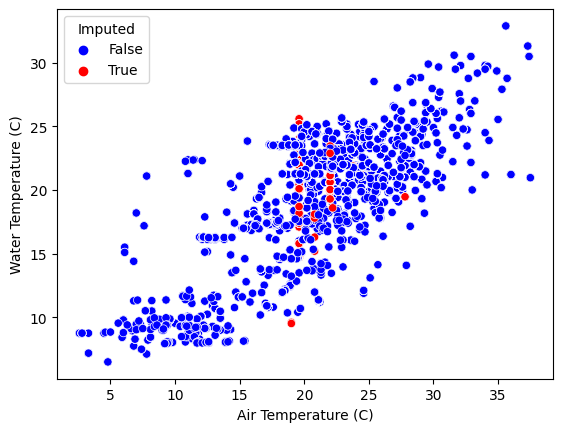

In [29]:
attempt2["Imputed"] = (canada_data["Air Temperature (C)"].isna()) & (~attempt1["Air Temperature (C)"].isna() | ~attempt2["Air Temperature (C)"].isna())
sns.scatterplot(data=attempt2, x="Air Temperature (C)", y="Water Temperature (C)", hue="Imputed", palette={True: "red", False: "blue"});


### F.1.3 Living conditions
This section begins to investigate the living conditions of fish at different locations and time periods. Continue using the updated dataset with the imputed missing values in attempts 1 and 2 of the previous section.

#### F.1.3.1 Air-water temperatures: Summary statistics
Use a single `groupby` statement to view the minimum, mean, standard deviation, and maximum air temperature and water temperature for each project during the month of August (use the `Month` column). 

*(5 points)*

In [11]:
stats = attempt2[attempt2["Month"] == 8].groupby("Project Name")[["Water Temperature (C)", "Air Temperature (C)"]].agg(
    ['mean', 'std', 'min', 'max']
)
print(stats)

                                             Water Temperature (C)            \
                                                              mean       std   
Project Name                                                                   
2013 Bridle Shiner Critical Habitat Survey               22.052182  0.503887   
2013 Crown Marsh Survey                                  22.007084  1.240151   
2013 GLAP Survey of Detroit River                        22.028226  0.392402   
2013 Grass Pickerel Niagara Drains                       20.105641  2.426792   
2013 Grass Pickerel Twenty Mile Creek                    22.380238  2.533686   
2013 Lake Chubsucker Critical Habitat Survey             21.671746  1.619878   
2013 Mussel Fish Community Assessment                    23.155645  1.156345   
2013 Pugnose Minnow Lake St Clair Drains                 20.713163  1.676571   
2013 Species at Risk Assessment                          22.075600  0.080936   
2013 Spotted Gar Critical Habitat Survey

#### F.1.3.2 Air-water temperatures: visualizing yearly trend
Make lineplots showing maximum air temperature and water temperature by `Month` and `Region`. To construct `Region`, use the Pandas function `cut()` to satisfy the following conditions:

- Rows with a latitude lower than 42.4 should have *Southern* in the `Region` column 
- Rows with a latitude between 42.4 and 42.8 should have *Central* in the `Region` column 
- Rows with a latitude higher than 42.8 should have *Northern* in the `Region` column 

You can have the month on the horizontal axis, the temperature on the vertical axis, different colors for different regions, and different styles (solid line / dotted line) to indicate air/water temperature.

Does anything in the visualization surprise you? Why or why not? 

*(14 points)*

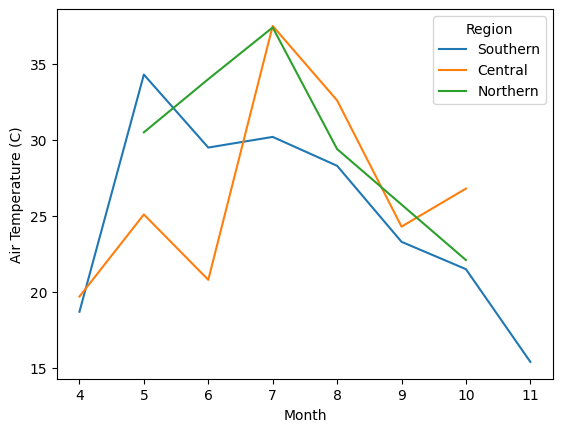

In [12]:
attempt2["Region"] = pd.cut(attempt2["Start Latitude"], 
                            bins=[-float('inf'), 42.4, 42.8, float('inf')],
                            labels=['Southern', 'Central', 'Northern'])

max_temps = attempt2.groupby(['Month', 'Region'])[['Air Temperature (C)', 'Water Temperature (C)']].max().reset_index()



sns.lineplot(data=max_temps, x='Month', y='Air Temperature (C)', hue='Region');


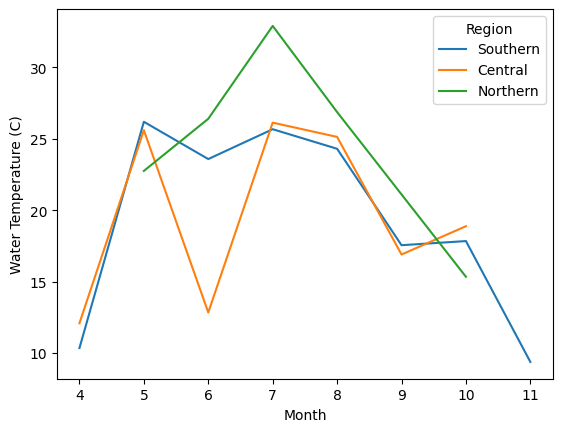

In [13]:
sns.lineplot(data=max_temps, x='Month', y='Water Temperature (C)', hue='Region');

It is surprising that the air temperature in the Southern region peaks a full 2 months before the other two regions. It is also surprising that both max air and max water temperatures in the Central region crater in June, an early summer month in the Northern Hemisphere.

### F.1.4 Fish diversity

Finally let's focus on the stars of this survey—the fish, of course.

#### F.1.4.1 Top 3 species by `Region`
Let's continue using our `Region` categorization. Find the top three fish `Species` in each region by `Number Captured`. 

*(10 points)*

In [14]:
attempt2.groupby("Region").apply(
    lambda x: x.nlargest(3, "Number Captured")["Species"])

Region        
Southern  4619              Lepomis sp
          7539     Notropis volucellus
          3692     Lepomis macrochirus
Central   5438    Labidesthes sicculus
          6613    Notropis heterolepis
          5297    Labidesthes sicculus
Northern  8139           Pimephales sp
          1180        Luxilus cornutus
          2215           Chrosomus eos
Name: Species, dtype: object

#### F.1.4.2 Species spread across `Region`
Are certain fish only found in some regions? Visualize how many species are in all three regions, how many are in two of three, and how many were only captured in one region. 

*(10 points)*

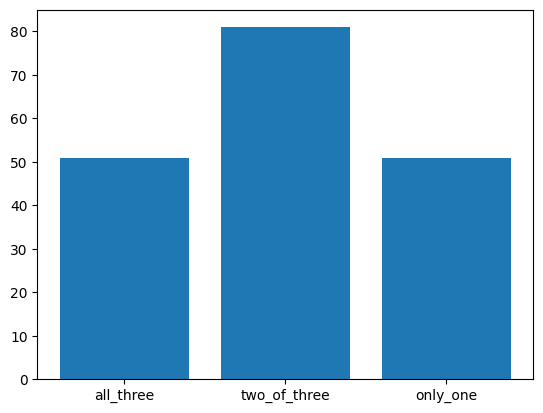

In [15]:
species_by_region = attempt2.groupby('Region')['Species'].unique()

regional_species = {
    "Southern": set(species_by_region["Southern"][~pd.isna(species_by_region["Southern"])]),
    "Central": set(species_by_region["Central"][~pd.isna(species_by_region["Central"])]),
    "Northern": set(species_by_region["Northern"][~pd.isna(species_by_region["Northern"])])
}

all_three = regional_species['Southern'] & regional_species['Central'] & regional_species['Northern']
two_of_three = ((regional_species['Southern'] & regional_species['Central']) | (regional_species['Southern'] & regional_species['Northern']) | (regional_species['Central'] & regional_species['Northern']) 
                - all_three)
only_one = (regional_species['Southern'] ^ regional_species['Central'] ^ regional_species['Northern']) -  two_of_three

plt.bar(["all_three", "two_of_three", "only_one"], [len(all_three), len(two_of_three), len(only_one)]);



#### F.1.4.3 Exclusive fishes by region
What percentage of all species are exclusively captured in the Southern region? How about the Northern Region? And the Central region? 

*(10 points)*

**Hint:**

1. Find the number of distinct regions in which each species is found.
2. Filter the species that are found only in one region.
3. Group the data, containing only the species found in (2), by region, count the number of unique species in each group, and divide by the total number of distinct species.

In [16]:
regions_per_species = attempt2.groupby("Species")["Region"].nunique()
species_in_one_region = regions_per_species[regions_per_species == 1].index

regions_of_species_in_one_region = attempt2[attempt2["Species"].isin(species_in_one_region)].groupby('Region')['Species'].nunique()
total_species = attempt2['Species'].nunique()
exclusive_species_percentage = (regions_of_species_in_one_region / total_species) * 100
print(exclusive_species_percentage)

Region
Southern     9.090909
Central      4.545455
Northern    25.000000
Name: Species, dtype: float64


#### F.1.4.4 Turbidity
Turbidity (`Turbidity (ntu)`) quantifies the level of cloudiness in liquid. For fish in each of the three regions, is there a linear association between turbidity and number of fish caught? You may consider a correlation higher than 50% in magnitude as presence of a linear association.

*(5 points)*

In [17]:
correlations = attempt2.groupby("Region")[['Turbidity (ntu)', 'Number Captured']].apply(lambda x: x.corr().iloc[0,1])

print(correlations)

Region
Southern   -0.019202
Central    -0.016327
Northern    0.063456
dtype: float64


There is no linear association between turbidity and number of fish caught in any of the three regions as none of the regions' correlation coefficients are greater than 0.5.

#### F.1.4.5 Fish dimensions
Now let's turn to the length of fish captured, given by `Maximum (mm)` and `Minimum (mm)`. Find the overall maximum and minimum lengths of all fish in each region. Which region has the largest range in captured fish length? 

*(4 points)*

In [18]:
fish_length = attempt2.groupby("Region").agg(
    max_length=('Maximum (mm)', 'max'),
    min_length=('Minimum (mm)', 'min')
)
fish_length.head()


,max_length,min_length
Region,,
Southern,1130.0,8.0
Central,785.0,9.0
Northern,760.0,10.0


In [19]:
fish_length["range"] = fish_length["max_length"] - fish_length["min_length"]

print(fish_length["range"].idxmax())

Southern


## F.2 GDP, surplus, and compensation

The dataset *Real GDP.csv* contains the GDP of each US State for all years starting from 1997 until 2020. The data is at *State* level, i.e., each observation corresponds to a unique State.

The dataset *Surplus.csv* contains the surplus of each US State for all years starting from 1997 until 2020. The data is at *year* level, i.e., each observation corresponds to a unique year.

The dataset *Compensation.csv* contains *Compensation* and *Chain-type quantity indexes for real GDP* for each US State and year starting from 1997 to 2020. The dataset is at *Year-State-Description* level, i.e., each observation corresponds to a unique `Year`-`State`-`Description` combination where `Description` refers to either *Compensation* or *Chain-type quantity indexes for real GDP*. 

In [20]:
real_gdp = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Data/Real_GDP.csv")
surplus = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Data/Surplus.csv")
compensation = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Data/Compensation.csv")

### F.2.1 Combining datasets
Combine all these datasets to obtain a dataset at *State-Year* level, i.e., each observation corresponds to a unique `State`-`Year` combination. The combined dataset must contain the GDP, surplus, *Compensation*, and *Chain-type quantity indexes for real GDP* for each US State and all years starting from 1997 until 2020. *Note that each observation must contain the name of the US State, year, and the four values (GDP, surplus, compensation, and Chain-type quantity indexes for real GDP).*

**Hint**: Here is one way to do it:

1. Melt the GDP dataset to year-State level 

2. Melt the Surplus dataset to year-State level 

3. Pivot the compensation dataset to year-State level

4. Now that all the datasets are at the year-State level, merge them!

*(3 + 3 + 3 + 1 = 10 points)*

In [21]:
real_gdp_melted = real_gdp.drop(columns = ["Description"]).melt(
    id_vars=['State'],
    var_name='Year',
    value_name='GDP'
)

surplus_melted = surplus.melt(
    id_vars=['Year'],
    var_name='State',
    value_name='Surplus'
)

compensation_pivot = compensation.pivot_table(
    index=['Year', 'State'],
    columns='Description',
    values='value'
).reset_index()

real_gdp_melted['Year'] = real_gdp_melted['Year'].astype(str)
real_gdp_melted['State'] = real_gdp_melted['State'].astype(str)

surplus_melted['Year'] = surplus_melted['Year'].astype(str)
surplus_melted['State'] = surplus_melted['State'].astype(str)

compensation_pivot['Year'] = compensation_pivot['Year'].astype(str)
compensation_pivot['State'] = compensation_pivot['State'].astype(str)



merged = pd.merge(real_gdp_melted, surplus_melted, on=['Year', 'State'])
merged = pd.merge(merged, compensation_pivot, on=['Year', 'State'])
merged.head()

,State,Year,GDP,Surplus,Chain-type quantity indexes for real GDP,Compensation (millions of dollars)
0,Alabama,1997,144501.2,37247.9,76.356,61083.8
1,Alaska,1997,42211.3,11061.3,72.424,12347.8
2,Arizona,1997,168408.8,53776.0,62.043,69876.9
3,Arkansas,1997,82571.3,23316.0,76.108,32715.5
4,California,1997,1378276.5,431069.4,65.225,574432.9


### F.2.2 Time trend: GDP with region
Merge the file *State_region_mapping.csv* with the dataset obtained in the previous question. Make a lineplot showing the mean GDP for each of the five regions with year. Do not display the confidence interval. Which two regions seems to have the least growth in GDP over the past 24 years? 

*(5 points)*

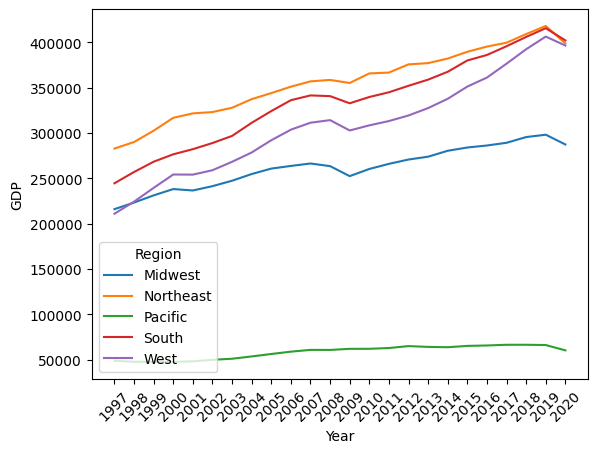

In [22]:
state_region_mapping = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Data/State_Region_Mapping.csv")
merged2 = pd.merge(merged, state_region_mapping, on=['State'])

gdp_by_region = merged2.groupby(['Region', 'Year'])['GDP'].mean().reset_index()
sns.lineplot(x='Year', y='GDP', hue='Region', data=gdp_by_region);
plt.xticks(rotation=45);


The Pacific and Midwest Regions seem to have the least GDP growth over the last 24 years.